# Libraries & Loading csv file

In [ ]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
df_train = pd.read_csv("Test.csv")

# reading the test file since it has managegable number of rows (5000).
# The bigger file (train) is too huge for colab to run without crashing

In [ ]:
df_train.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [ ]:
df_train.shape

(5000, 2)

# Text Preprocessing/Cleaning

Steps taken
* stop word removal
* Lowercase
* removed punctuations, numbers
* stemming and lemmatization
* minimum word frequency (5)






In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


## function to clean text
def clean_text(text, rare_words):
    text = text.lower()    # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))     # Remove punctuation & numbers
    words = nltk.word_tokenize(text)    # Tokenize text
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stop_words and word not in rare_words]     # Remove stop words, rare words, and apply stemming and lemmatization
    return ' '.join(words)



# finding word frequency

# Concatenate all text into a single string & tokenize
all_text = ' '.join(df_train['text'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation))))
all_words = nltk.word_tokenize(all_text)

#frequency distribution of words & define a threshold for rare words
word_freq = Counter(all_words)

rare_word_threshold = 5
rare_words = set([word for word, freq in word_freq.items() if freq < rare_word_threshold])

## rare word removal decreased the total vocabulary size from 38k words to ~8k words
## we can play around with the rare_word_threshold


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Apply text cleaning to the DataFrame
df_train['cleaned_text'] = df_train['text'].apply(lambda x: clean_text(x, rare_words))
df_train.head()

,text,label,cleaned_text
0,I always wrote this series off as being a comp...,0,alway wrote seri complet jim belushi involv he...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,st watch dirstev typic mari kate ashley fare k...
2,This movie was so poorly written and directed ...,0,movi poorli written direct fell asleep minut m...
3,The most interesting thing about Miryang (Secr...,1,interest thing secret sunshin actor lee shina ...
4,"when i first read about ""berlin am meer"" i did...",0,first read berlin didnt expect much thought ri...


In [ ]:
## view a few examples of how the text cleaning has transformed text

#checking 8th row

print(df_train.loc[8][0])
print(" ")
print(df_train.loc[8][2])
print(" ")
print(f"label: {df_train.loc[8][1]}")

IT IS A PIECE OF CRAP! not funny at all. during the whole movie nothing ever happens. i almost fell asleep, which in my case happens only if a movie is rally bad. (that is why it didn't get 1 (awful) out of 10 but 2).don't be fooled, like i was, by first review. a waste of money and your time! spend it on other stuff. at this point i'm finished with my review but i have to fill in at least ten lines of text so i will go on.... (ctrl+c, ctrl+v) :))) IT IS A PIECE OF CRAP! not funny at all. during the whole movie nothing ever happens. i almost fell asleep, which in my case happens only if a movie is rally bad. (that is why it didn't get 1 (awful) out of 10 but 2).don't be fooled, like i was, by first review. a waste of money and your time! spend it on other stuff. IT IS A PIECE OF CRAP! not funny at all. during the whole movie nothing ever happens. i almost fell asleep, which in my case happens only if a movie is rally bad. (that is why it didn't get 1 (awful) out of 10 but 2).don't be f

# Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()
#bag of words by default is uni-gram (single word as token) but we can change it in the parameter "ngram_range"
#where ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams.

# basically bag of word algorithm is a n-gram model of n=1 (or unigram)

# Fit and transform the text data
X_bag_of_words = vectorizer.fit_transform(df_train['cleaned_text'])



In [ ]:
X_bag_of_words

<5000x8654 sparse matrix of type '<class 'numpy.int64'>'
	with 427268 stored elements in Compressed Sparse Row format>

In [ ]:
# Convert to DataFrame for better visualization (optional)
df_bag_of_words = pd.DataFrame(X_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
df_bag_of_words.head()

,aaron,abandon,abbott,abc,abduct,abhishek,abil,abl,abli,aboard,...,zizek,zoe,zombi,zone,zoom,zorro,zu,zx,ème,õs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_bag_of_words.loc[10].sum()

315

# TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_train['cleaned_text'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf.head()

,aaron,abandon,abbott,abc,abduct,abhishek,abil,abl,abli,aboard,...,zizek,zoe,zombi,zone,zoom,zorro,zu,zx,ème,õs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tfidf.loc[10].sum()

14.158707396743857

# N-Grams

In [ ]:
## taking a n-gram of n=3 using CountVectorizer class

ngram_vectorizer = CountVectorizer(ngram_range=(3, 3))
X_ngrams = ngram_vectorizer.fit_transform(df_train['cleaned_text'])
df_ngrams = pd.DataFrame(X_ngrams.toarray(), columns=ngram_vectorizer.get_feature_names_out())
df_ngrams.head()

,aaron altman albert,aaron altman brook,aaron boon recur,aaron br hurt,aaron chanc br,aaron christian find,aaron fan rest,aaron friendli jack,aaron mormon real,aaron must good,...,zu warrior dub,zu warrior feel,zu warrior grip,zu warrior made,zu warrior one,zx act terribl,ème amaz oscar,ème imag pari,ème walter thoma,õs fashion period
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## adding a threshold since the number of n-grams increases exponentially with increase in n

frequency_threshold = 2 #chose 2 since it reduces n-grams from 521k to 11k

# Sum the frequencies of each n-gram across all documents
ngram_counts = df_ngrams.sum(axis=0)

# Filter n-grams based on the specified frequency threshold and create new dataframe
filtered_ngrams = ngram_counts[ngram_counts >= frequency_threshold].index.tolist()
df_ngrams = df_ngrams[filtered_ngrams]

# Display the filtered DataFrame
df_ngrams.head()

,abbott costello meet,abil grant may,abil perfectli copi,abl predict end,abl see movi,abl watch film,aboutbr br dont,absolut brilliant realli,absolut love movi,absolut must see,...,youv never seen,youv seen end,youv seen like,youv seen movi,youv seen one,youv seen presid,zelah clark timothi,zero act abil,zombi death hous,zombi extrem pestil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Join the label column to the n-gram DataFrame
df_ngrams['label'] = df_train['label']
df_ngrams

<ipython-input-18-2467565e202d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ngrams['label'] = df_train['label']


,abbott costello meet,abil grant may,abil perfectli copi,abl predict end,abl see movi,abl watch film,aboutbr br dont,absolut brilliant realli,absolut love movi,absolut must see,...,youv seen end,youv seen like,youv seen movi,youv seen one,youv seen presid,zelah clark timothi,zero act abil,zombi death hous,zombi extrem pestil,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Function to plot top 10 tokens for each class
def plot_top_ngrams(df, label, top_n=10):
    df_label = df[df['label'] == label]
    df_label = df_label.drop('label', axis=1)
    ngram_counts = df_label.sum(axis=0)
    top_ngrams = ngram_counts.nlargest(top_n)
    # Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x=top_ngrams.values, y=top_ngrams.index)
    plt.title(f'Top {top_n} 3-grams for label {label}')
    plt.xlabel('Frequency')
    plt.ylabel('3-gram')
    plt.show()

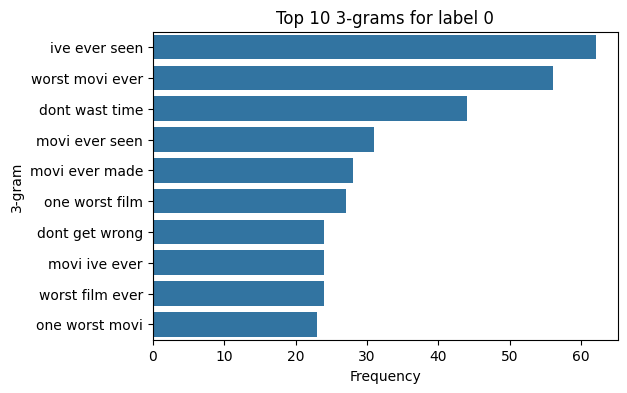

In [ ]:
# Plot top 10 3-grams for negative class (label=0)
plot_top_ngrams(df_ngrams, 0)

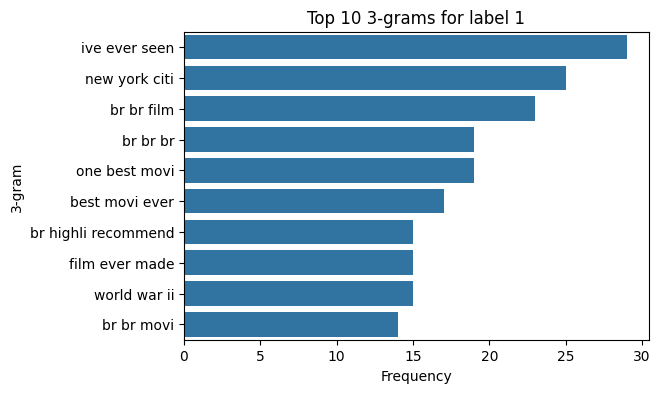

In [ ]:
# Plot top 10 3-grams for positive class (label=1)
plot_top_ngrams(df_ngrams, label=1)

# Classification Task

##### now we have three dataframes

* df_bag_of_words (BoW)
* df_tfidf (TF-IDF)
* df_ngrams (n-gram)


##### For each of the dataframe we will try to use the word counts as features to predict the label using 3 seperate ML algorithms

* Logistic Regression
* SVM
* Random Forest

##### We will also conduct hyperparameter optimizing by finding the best hyperparameters via GridSearchCV or RandomSearchCV

##### For each model we will have 3 key evaluation metrics
* Confusion Matrix
* Classification Report (Accuracy, Precision, Recall)
* AUC, ROC Curve

# Bag of Words

In [ ]:
# Prepare the data
X = df_bag_of_words
y = df_train['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

## Evaluation of Logistic Regression

Accuracy: 0.8360
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       503
           1       0.84      0.83      0.83       497

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

Confusion Matrix:
[[422  81]
 [ 83 414]]
         Coefficient
excel       1.244352
favorit     1.207084
today       1.152822
rare        0.979007
hardcor     0.974732
awesom      0.956237
chanc       0.956209
hilari      0.931983
great       0.893248
everyon     0.872530
            Coefficient
worst         -1.859294
wast          -1.795334
bore          -1.321739
wors          -1.239298
terribl       -1.220637
aw            -1.214977
poor          -1.184661
disappoint    -1.140629
fail          -1.070963
lack          -0.998401
Logistic Regression AUC: 0.902


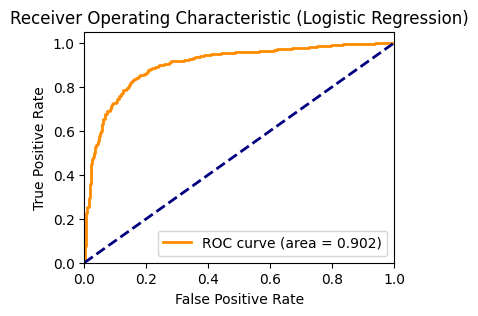

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# print the coefficients of the model
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False).head(10))
print(coefficients.sort_values(by='Coefficient', ascending=True).head(10))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming the logistic regression model is named `log_reg` and is already trained
# Assuming `X_test` and `y_test` are already defined

# Get the probability scores for the positive class
logit_probs = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
logit_auc = roc_auc_score(y_test, logit_probs)
print("Logistic Regression AUC: {:.3f}".format(logit_auc))

# Generate ROC curve data
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_logit, tpr_logit, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % logit_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## SVM

In [ ]:
# Initialize and train the SVM model
model = SVC(kernel='linear',probability=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Evaluation of SVM

Accuracy: 0.8180
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       503
           1       0.82      0.81      0.82       497

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

Confusion Matrix:
[[415  88]
 [ 94 403]]
          Coefficient
favorit      0.486781
greatest     0.455875
excel        0.444537
roll         0.438958
today        0.433115
funniest     0.422441
exactli      0.420029
hardcor      0.411512
boon         0.408888
rare         0.406517
            Coefficient
wast          -0.635680
worst         -0.630226
wouldnt       -0.458919
aw            -0.458524
leon          -0.457405
pretenti      -0.456992
disappoint    -0.441123
sorri         -0.435507
poor          -0.435125
terribl       -0.415933
SVM AUC: 0.883


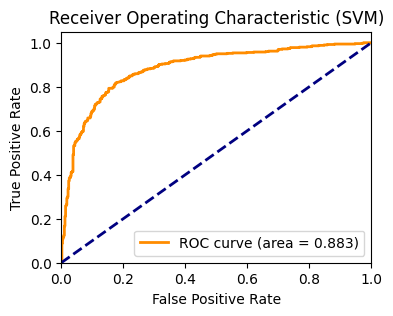

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# If you want to print the coefficients of the model (optional)
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False).head(10))
print(coefficients.sort_values(by='Coefficient', ascending=True).head(10))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming the logistic regression model is named `log_reg` and is already trained
# Assuming `X_test` and `y_test` are already defined

# Get the probability scores for the positive class
logit_probs = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
logit_auc = roc_auc_score(y_test, logit_probs)
print("SVM AUC: {:.3f}".format(logit_auc))

# Generate ROC curve data
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_logit, tpr_logit, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % logit_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

## Evaluation of Random Forest

Accuracy: 0.8290
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       503
           1       0.84      0.81      0.82       497

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

Confusion Matrix:
[[426  77]
 [ 94 403]]
         Importance
bad        0.016755
great      0.010842
wast       0.009930
worst      0.009871
aw         0.006253
excel      0.005761
love       0.005687
noth       0.005464
terribl    0.004911
horribl    0.004842
bore       0.004693
poor       0.004608
best       0.004606
movi       0.004512
plot       0.004217
enjoy      0.003973
tri        0.003971
wors       0.003760
beauti     0.003664
stupid     0.003626
Random Forest AUC: 0.914


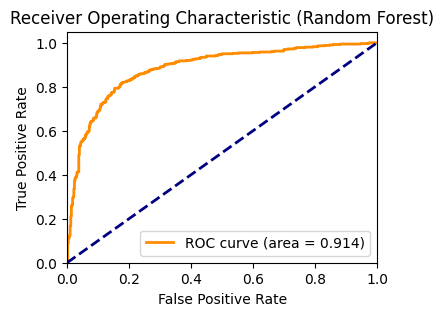

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Feature importance (optional)
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances.head(20))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming the logistic regression model is named `log_reg` and is already trained
# Assuming `X_test` and `y_test` are already defined

# Get the probability scores for the positive class
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
logit_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest AUC: {:.3f}".format(logit_auc))

# Generate ROC curve data
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_logit, tpr_logit, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % logit_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# TF-IDF

In [ ]:
# Prepare the data
X = df_tfidf
y = df_train['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression



In [ ]:

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)


## Logistic Regression Evaluation

Accuracy: 0.8590
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       503
           1       0.84      0.88      0.86       497

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000

Confusion Matrix:
[[420  83]
 [ 58 439]]
         Coefficient
great       4.526425
love        3.151120
excel       2.857981
best        2.660722
favorit     2.501688
enjoy       2.425616
today       2.151377
beauti      2.103068
well        2.073834
still       1.793836
         Coefficient
bad        -4.828833
worst      -3.868840
wast       -3.611673
bore       -2.845393
aw         -2.556824
poor       -2.505383
terribl    -2.485608
noth       -2.468734
wors       -2.370882
horribl    -2.274261
Logistic Regression AUC: 0.931


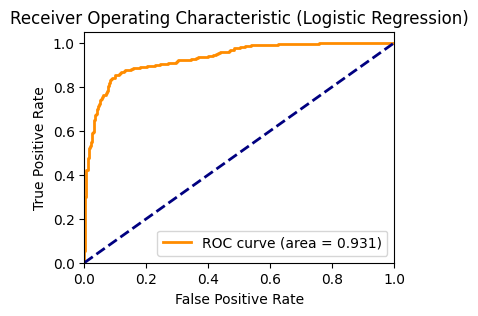

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# print the coefficients of the model
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False).head(10))
print(coefficients.sort_values(by='Coefficient', ascending=True).head(10))


# Get the probability scores for the positive class
logit_probs = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
logit_auc = roc_auc_score(y_test, logit_probs)
print("Logistic Regression AUC: {:.3f}".format(logit_auc))

# Generate ROC curve data
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_logit, tpr_logit, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % logit_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## SVM

In [ ]:
# Initialize and train the SVM model
model = SVC(kernel='linear',probability=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## SVM Evaluation

Accuracy: 0.8530
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       503
           1       0.85      0.86      0.85       497

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

Confusion Matrix:
[[427  76]
 [ 71 426]]
         Coefficient
great       3.483216
love        2.532419
excel       2.517444
today       2.342569
best        2.331997
favorit     2.211649
enjoy       2.111236
hilari      1.884859
well        1.878667
perfect     1.827865
            Coefficient
worst         -3.748194
bad           -3.567062
wast          -3.305593
bore          -3.073189
fail          -2.526164
disappoint    -2.507160
terribl       -2.414205
poor          -2.409850
wors          -2.299448
horribl       -2.267218
SVM AUC: 0.928


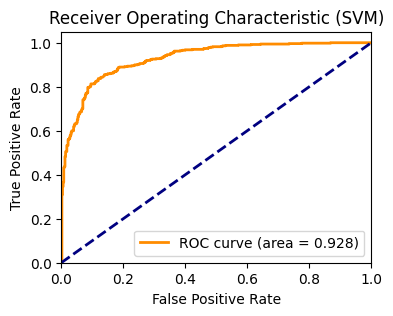

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# If you want to print the coefficients of the model (optional)
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False).head(10))
print(coefficients.sort_values(by='Coefficient', ascending=True).head(10))

# Get the probability scores for the positive class
logit_probs = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
logit_auc = roc_auc_score(y_test, logit_probs)
print("SVM AUC: {:.3f}".format(logit_auc))

# Generate ROC curve data
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_logit, tpr_logit, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % logit_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


## Random Forest Evaluation

Accuracy: 0.8330
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       503
           1       0.84      0.82      0.83       497

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

Confusion Matrix:
[[426  77]
 [ 90 407]]
         Importance
bad        0.020407
great      0.012423
worst      0.011900
wast       0.011287
love       0.006800
aw         0.006769
terribl    0.006003
poor       0.005741
excel      0.005380
best       0.005370
bore       0.005259
noth       0.005230
horribl    0.004744
even       0.004476
movi       0.004396
plot       0.004295
dont       0.004269
wors       0.004257
tri        0.003854
enjoy      0.003852
Random Forest AUC: 0.911


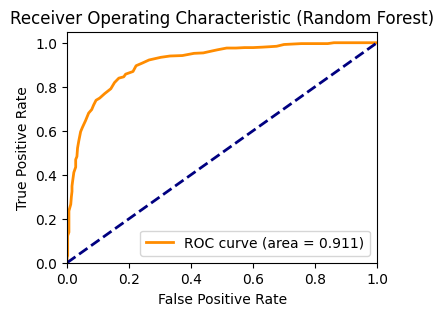

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Feature importance (optional)
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances.head(20))

# Get the probability scores for the positive class
logit_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
logit_auc = roc_auc_score(y_test, logit_probs)
print("Random Forest AUC: {:.3f}".format(logit_auc))

# Generate ROC curve data
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_logit, tpr_logit, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % logit_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

#N-Gram

## Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_ngrams is your DataFrame containing the N-gram features and the 'label' column

# Step 2: Split the data into training and testing sets
# Extract features and labels into separate variables
X = df_ngrams.drop('label', axis=1)  # Features are all columns except 'label'
y = df_ngrams['label']               # Labels are in the 'label' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test)



## Logistic Regression Evaluation

Accuracy of Logistic Regression model: 0.688
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.59      0.65       503
           1       0.65      0.79      0.72       497

    accuracy                           0.69      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.70      0.69      0.68      1000

Logistic Regression AUC: 0.768


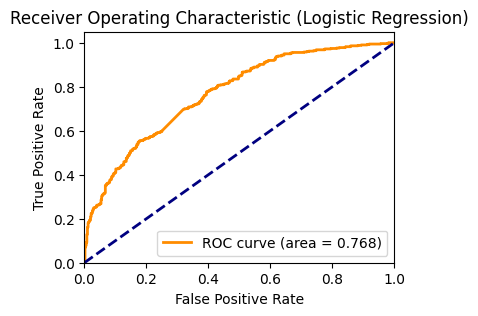

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of Logistic Regression model:", accuracy)
print("Classification Report:\n", report)


# Get the probability scores for the positive class
logit_probs = log_reg.predict_proba(X_test)[:, 1]

# Calculate the AUC score
logit_auc = roc_auc_score(y_test, logit_probs)
print("Logistic Regression AUC: {:.3f}".format(logit_auc))

# Generate ROC curve data
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_logit, tpr_logit, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % logit_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# print the coefficients of the model
coefficients = pd.DataFrame(log_reg.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False).head(10))
print(coefficients.sort_values(by='Coefficient', ascending=True).head(10))


                         Coefficient
br highli recommend         1.340411
best movi ever              1.061678
thoroughli enjoy movi       1.021018
highli recommend movi       1.011033
highli recommend film       0.997118
first saw film              0.969146
well worth watch            0.934754
would definit recommend     0.929709
second world war            0.928946
one best movi               0.915763
                        Coefficient
worst movi ever           -1.974697
dont wast time            -1.584424
one worst film            -1.478354
worst film ever           -1.371469
mysteri scienc theater    -1.124830
realli want like          -1.120302
realli bad movi           -1.091495
wast time money           -1.017944
complet wast time         -0.992134
br want see               -0.970608


## SVM

In [ ]:
from sklearn.linear_model import SGDClassifier

# Create an SVM model using SGD for better performance on large datasets
svm_sgd = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)

# Train the model
svm_sgd.fit(X_train, y_train)


## SVM Evaluation

In [ ]:
# Predict on the testing set
y_pred_sgd = svm_sgd.predict(X_test)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
report_sgd = classification_report(y_test, y_pred_sgd)

print("Accuracy of SGD-SVM model:", accuracy_sgd)
print("Classification Report:\n", report_sgd)


# Predict decision function scores
decision_function_scores = svm_sgd.decision_function(X_test)

# Calculate AUC
auc_sgd = roc_auc_score(y_test, decision_function_scores)
print("AUC of SGD-SVM model:", auc_sgd)

# Compute ROC curve data
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, decision_function_scores)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_sgd, tpr_sgd, label='SGD-SVM (AUC = {:.3f})'.format(auc_sgd))
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SGD-SVM')
plt.legend(loc='lower right')
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming df_ngrams is your DataFrame containing the N-gram features and the 'label' column
X = df_ngrams.drop('label', axis=1)  # Features
y = df_ngrams['label']               # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model with adjusted settings
random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

## Random Forest Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of Random Forest model:", accuracy)
print("Classification Report:\n", report)


# Predict probabilities for the test set
rf_probs = random_forest.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate AUC
rf_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest AUC: {:.3f}".format(rf_auc))

# Generate ROC curve data
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (area = %0.3f)' % rf_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()
